In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
#check duplicated 
data.duplicated().sum()

723

In [42]:
data.drop_duplicates(inplace=True)

# Feature Selection 

## Filter Methods

## Linear correlarion

In [43]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


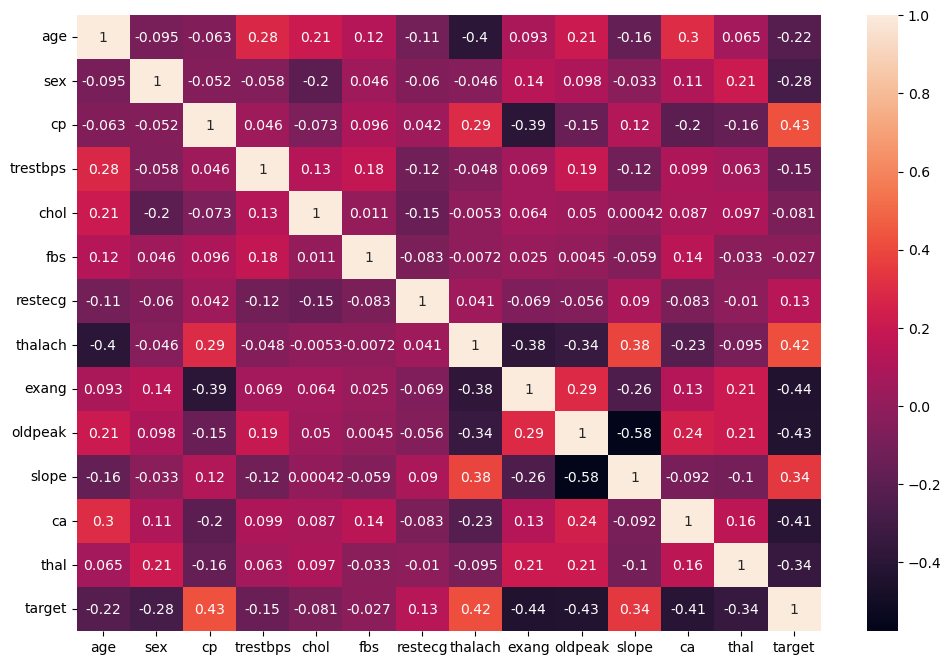

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [45]:
data.corr()['target'][:-1]

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
Name: target, dtype: float64

In [46]:
#select feature with correlation with value > 0.1 or <-0.1  [-0.1,0.1]-->drop
ser=data.corr()['target'][:-1].apply(lambda x : abs(x)>0.1)
columns=[ind for ind in ser.index if ser[ind] ]

In [47]:
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [48]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [49]:
from sklearn.feature_selection import VarianceThreshold

v=VarianceThreshold(threshold=0.2)
v.fit(X)

VarianceThreshold(threshold=0.2)

In [50]:
v.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [51]:
columns=data.columns[:-1]

In [52]:
columns[v.get_support()]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [53]:
columns[~v.get_support()]

Index(['fbs'], dtype='object')

## Wrapper methods


In [54]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [55]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [59]:
import warnings
warnings.filterwarnings('ignore')

### Forward Elimination

In [60]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

fel=SequentialFeatureSelector(estimator=lr,direction='forward',scoring='accuracy')
fel.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(), scoring='accuracy')

In [62]:
columns=data.columns[:-1]
columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [63]:
fel.get_support()

array([False,  True,  True,  True, False, False, False,  True, False,
        True, False, False,  True])

In [64]:
columns[fel.get_support()]

Index(['sex', 'cp', 'trestbps', 'thalach', 'oldpeak', 'thal'], dtype='object')

In [65]:
new_data=data[columns[fel.get_support()]]
new_data.head()

,sex,cp,trestbps,thalach,oldpeak,thal
0,1,0,125,168,1.0,3
1,1,0,140,155,3.1,3
2,1,0,145,125,2.6,3
3,1,0,148,161,0.0,3
4,0,0,138,106,1.9,2
